In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse

In [4]:
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

In [6]:
epochs = 100
alpha = 0.01

In [16]:
# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector 
(X, y) = make_blobs(n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=20)

In [17]:
X[0:4]

array([[ 7.85666084,  6.80673325],
       [ 3.0617736 ,  8.83668264],
       [ 2.99052487,  7.66466894],
       [ 7.33697543,  8.35873442]])

In [18]:
# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones(X.shape[0]), X]

In [19]:
X[0:4]

array([[ 1.        ,  7.85666084,  6.80673325],
       [ 1.        ,  3.0617736 ,  8.83668264],
       [ 1.        ,  2.99052487,  7.66466894],
       [ 1.        ,  7.33697543,  8.35873442]])

In [21]:
# initialize the weight matrix such it has the same number of columns as the input feature
W = np.random.uniform(size=(X.shape[1],))

In [36]:
lossHistory = []

In [37]:
for epoch in np.arange(0, epochs):
    preds = sigmoid_activation(X.dot(W))
    
    error = preds -y
    
    loss = np.sum(error**2)
    lossHistory.append(loss)
    print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))
    
    # the gradient update is therefore the dot product between
    # the transpose of `X` and our error, scaled by the total
    # number of data points in `X`
    gradient = X.T.dot(error) / X.shape[0]
    
    W += -alpha * gradient

[INFO] epoch #1, loss=8.2073176
[INFO] epoch #2, loss=8.1094679
[INFO] epoch #3, loss=8.0138592
[INFO] epoch #4, loss=7.9204192
[INFO] epoch #5, loss=7.8290786
[INFO] epoch #6, loss=7.7397709
[INFO] epoch #7, loss=7.6524324
[INFO] epoch #8, loss=7.5670015
[INFO] epoch #9, loss=7.4834195
[INFO] epoch #10, loss=7.4016298
[INFO] epoch #11, loss=7.3215778
[INFO] epoch #12, loss=7.2432113
[INFO] epoch #13, loss=7.1664799
[INFO] epoch #14, loss=7.0913352
[INFO] epoch #15, loss=7.0177305
[INFO] epoch #16, loss=6.9456211
[INFO] epoch #17, loss=6.8749636
[INFO] epoch #18, loss=6.8057164
[INFO] epoch #19, loss=6.7378394
[INFO] epoch #20, loss=6.6712940
[INFO] epoch #21, loss=6.6060428
[INFO] epoch #22, loss=6.5420499
[INFO] epoch #23, loss=6.4792806
[INFO] epoch #24, loss=6.4177014
[INFO] epoch #25, loss=6.3572800
[INFO] epoch #26, loss=6.2979853
[INFO] epoch #27, loss=6.2397871
[INFO] epoch #28, loss=6.1826563
[INFO] epoch #29, loss=6.1265649
[INFO] epoch #30, loss=6.0714856
[INFO] epoch #31, l

In [38]:
# to demonstrate how to use our weight matrix as a classifier,
# let's look over our a sample of training examples
for i in np.random.choice(250, 10):
    activation = sigmoid_activation(X[i].dot(W))
    
    label = 0 if activation < 0.5 else 1
    
    print("activation={:.4f}; predicted_label={}, true_label={}".format(activation, label, y[i]))

activation=0.0229; predicted_label=0, true_label=0
activation=0.0389; predicted_label=0, true_label=0
activation=0.1227; predicted_label=0, true_label=0
activation=0.1113; predicted_label=0, true_label=0
activation=0.9209; predicted_label=1, true_label=1
activation=0.0948; predicted_label=0, true_label=0
activation=0.0734; predicted_label=0, true_label=0
activation=0.9827; predicted_label=1, true_label=1
activation=0.0965; predicted_label=0, true_label=0
activation=0.9171; predicted_label=1, true_label=1


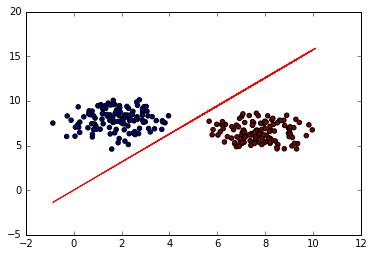

In [39]:
# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]
plt.figure()
plt.scatter(X[:,1], X[:,2], marker="o",c=y)
plt.plot(X, Y, "r-")
plt.show()

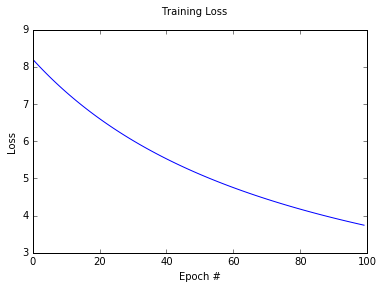

In [41]:
# plot the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()